In [1]:
A = [1898,1,1952, 2,1958, 3,1963, 4,1968 ,5,1971, 6,1974, 8,1975, 7,1975.001, 9,1978, 10,1981, 12,1981.001 ,13,1985 ,14,1988 ,15,1991, 19
,1995 ,20, 1999, 20,2001.004, 20,2001.002 ,21,2001.001, 23,2006, 24,2007, 26,2008, 27,2009, 28,2011, 29,2012,32]
n = len(A)
x = []
y = []
for i in range(n):
    if i %2 == 0:
        x.append(A[i])
    else:
        y.append(A[i])
#x = [1,2,4,7]    
#y = [0,7,4,10]
len(x)

26

In [2]:
import numpy as np
import math 

n = 3*(len(x)-1) # number of unknowns (a_i, b_i, c_i)
# Ax = b, initialize matrices to zeros for now
A = np.zeros((n,n))
b = np.zeros(n)

# condition 1
d_i = y

# condition 2
for i in range(len(x)-1):
    dx = x[i+1]-x[i]
    dy = y[i+1]-y[i]
    b[i*3] = dy
    # dy = a_i(dx)^3 + b_i(dx)^2 +  c_i(dx)
    a_i = math.pow(dx,3)
    b_i = math.pow(dx,2)
    c_i = math.pow(dx,1)
    A[[i*3],[i*3,i*3+1,i*3+2]]=[a_i,b_i,c_i]

# condition 3
# 3a_i(dx)^2 + 2b_i(dx) + c_i - c_i+1 = 0
for i in range(len(x)-2):
    dx = x[i+1]-x[i]
    row = [i*3 + 1]
    cols = [i*3,i*3+1,i*3+2,i*3+3,i*3+4,i*3+5]
    A[row,cols] = [3*math.pow(dx,2), 2*dx,1,0,0,-1]
    
# condition 4
# 6a_i(dx) + 2b_i - 2_b_i+1 = 0
for i in range(len(x)-2):
    dx = x[i+1]-x[i]
    row = [i*3 + 2]
    cols = [i*3, i*3+1,i*3+2,i*3+3,i*3+4]
    A[row,cols] = [6*dx,2,0,0,-2]
    
# condition 5
# 2b_1 = 0, 6a_n-1*(dx) + 2b_n-1 = 0
A[[3*(len(x)-2)+1],[1]] = 2
A[[3*(len(x)-2)+2],[3*(len(x)-2)]] = 6*(x[-1]-x[-2])
A[[3*(len(x)-2)+2],[3*(len(x)-2)+1]] = 2

(0.0, 4.0)

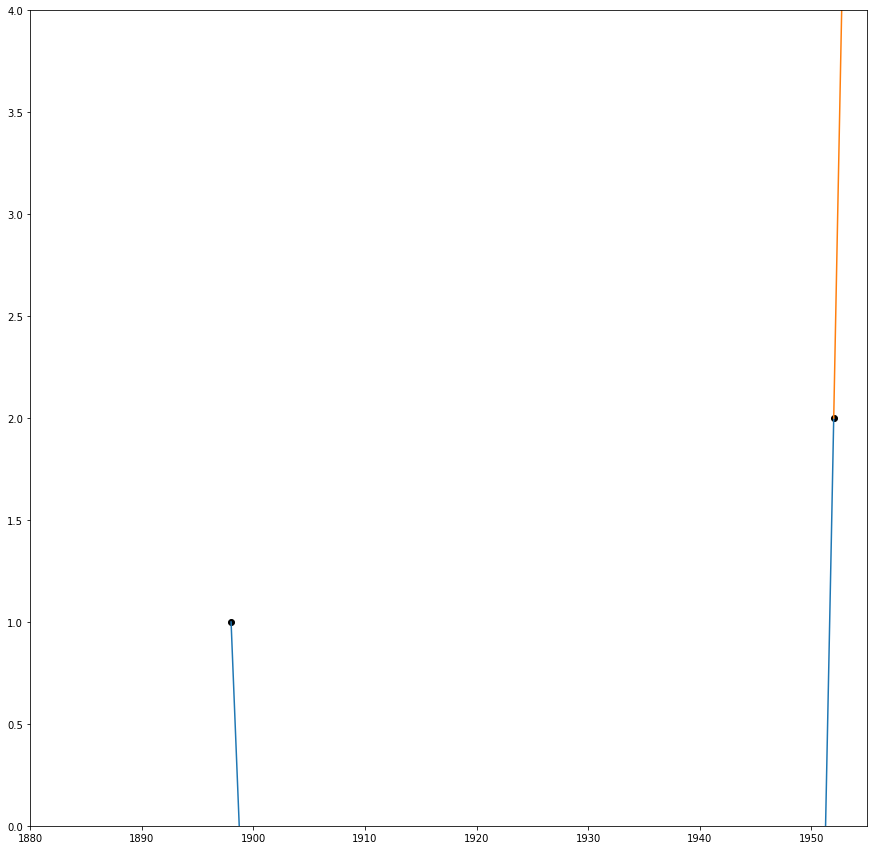

In [14]:
import matplotlib.pyplot as plt
from numpy import linalg as LA 

p = LA.solve(A,b)

width = 15
height = 15
N = 1000 # number of points in an interval, higher N means better smoothness

plt.figure(figsize=(width, height))
plt.plot(x,y,'ko') # plot data points
for i in range(len(x)-1):
    a_i = p[i*3]
    b_i = p[i*3+1]
    c_i = p[i*3+2]
    d_i = y[i]
    smooth_x = np.linspace(x[i],x[i+1],N) # x-values
    smooth_y = a_i*(smooth_x-x[i])**3 + b_i*(smooth_x-x[i])**2 + c_i*(smooth_x-x[i])+ d_i # y-values
    plt.plot(smooth_x,smooth_y)
plt.xlim(1880,1955)
plt.ylim(0,4)